In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Handling Missing Value

In [ ]:
df = pd.read_excel('Property Listing In Kuala Lumpur (Size Cleaned).xlsx')
df

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size_Type,Size,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.0,2.0,Serviced Residence,Built-up,1335.0,Fully Furnished
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6,7.0,NaN,Bungalow,Land area,6900.0,Partly Furnished
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,2.0,Condominium (Corner),Built-up,1875.0,Partly Furnished
3,"Cheras, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.0,2.0,Condominium (Corner),Built-up,1513.0,Partly Furnished
...,...,...,...,...,...,...,...,...,...
53878,"Bangsar, Kuala Lumpur","RM 5,100,000",5+1,4.0,NaN,Bungalow (Corner),Land area,7168.0,Fully Furnished
53879,"Bangsar, Kuala Lumpur","RM 5,000,000",5,4.0,NaN,Bungalow (Intermediate),Land area,15000.0,Unfurnished
53880,"Bangsar, Kuala Lumpur","RM 5,500,000",5+1,4.0,NaN,Bungalow (Intermediate),Land area,7168.0,Partly Furnished
53881,"Wangsa Maju, Kuala Lumpur","RM 480,000",3,2.0,NaN,Condominium (Intermediate),Built-up,1150.0,Unfurnished


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53883 entries, 0 to 53882
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       53883 non-null  object 
 1   Price          53635 non-null  object 
 2   Rooms          52177 non-null  object 
 3   Bathrooms      51870 non-null  float64
 4   Car Parks      36316 non-null  float64
 5   Property Type  53858 non-null  object 
 6   Size_Type      52820 non-null  object 
 7   Size           52646 non-null  float64
 8   Furnishing     46953 non-null  object 
dtypes: float64(3), object(6)
memory usage: 3.7+ MB


In [ ]:
df.isna().sum()

Location             0
Price              248
Rooms             1706
Bathrooms         2013
Car Parks        17567
Property Type       25
Size_Type         1063
Size              1237
Furnishing        6930
dtype: int64

In [ ]:
df[df.isnull().any(axis=1)]
df.head(10)

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size_Type,Size,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.0,2.0,Serviced Residence,Built-up,1335.0,Fully Furnished
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6,7.0,NaN,Bungalow,Land area,6900.0,Partly Furnished
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,2.0,Condominium (Corner),Built-up,1875.0,Partly Furnished
3,"Cheras, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.0,2.0,Condominium (Corner),Built-up,1513.0,Partly Furnished
5,"Taman Tun Dr Ismail, Kuala Lumpur","RM 5,350,000",4+2,5.0,4.0,Bungalow,Land area,7200.0,Partly Furnished
6,"Seputeh, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"Taman Tun Dr Ismail, Kuala Lumpur","RM 2,600,000",5,4.0,4.0,Semi-detached House,Land area,3600.0,Partly Furnished
8,"Taman Tun Dr Ismail, Kuala Lumpur","RM 1,950,000",4+1,4.0,3.0,2-sty Terrace/Link House (EndLot),Land area,1875.0,Partly Furnished
9,"Sri Petaling, Kuala Lumpur","RM 385,000",3,2.0,1.0,Apartment (Intermediate),Built-up,904.0,Partly Furnished


In [ ]:
# fill car parks coloumn with 0 value, because there is property that don't have a car parks
df['Car Parks'] = df['Car Parks'].fillna('0')
df.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size_Type,Size,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.0,2,Serviced Residence,Built-up,1335.0,Fully Furnished
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6,7.0,0,Bungalow,Land area,6900.0,Partly Furnished
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,2,Condominium (Corner),Built-up,1875.0,Partly Furnished
3,"Cheras, Kuala Lumpur",NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.0,2,Condominium (Corner),Built-up,1513.0,Partly Furnished


In [ ]:
df.isna().sum()

Location            0
Price             248
Rooms            1706
Bathrooms        2013
Car Parks           0
Property Type      25
Size_Type        1063
Size             1237
Furnishing       6930
dtype: int64

In [ ]:
# 0.46% of Price are null values
(df['Price'].isnull().sum() / df.shape[0]) * 100

0.4602564816361375

In [ ]:
# The rows with null values in Price columns are safe to remove it's only 0.46% of the total rows
df = df.dropna(subset=['Price'])
df.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size_Type,Size,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.0,2,Serviced Residence,Built-up,1335.0,Fully Furnished
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6,7.0,0,Bungalow,Land area,6900.0,Partly Furnished
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,2,Condominium (Corner),Built-up,1875.0,Partly Furnished
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.0,2,Condominium (Corner),Built-up,1513.0,Partly Furnished
5,"Taman Tun Dr Ismail, Kuala Lumpur","RM 5,350,000",4+2,5.0,4,Bungalow,Land area,7200.0,Partly Furnished


In [ ]:
df.isna().sum()

Location            0
Price               0
Rooms            1655
Bathrooms        1962
Car Parks           0
Property Type       0
Size_Type        1024
Size             1197
Furnishing       6856
dtype: int64

In [ ]:
# The rows with null values in Rooms columns are safe to remove it's only 3.16% of the total rows
df = df.dropna(subset=['Rooms'])
df.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size_Type,Size,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.0,2,Serviced Residence,Built-up,1335.0,Fully Furnished
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6,7.0,0,Bungalow,Land area,6900.0,Partly Furnished
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,2,Condominium (Corner),Built-up,1875.0,Partly Furnished
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.0,2,Condominium (Corner),Built-up,1513.0,Partly Furnished
5,"Taman Tun Dr Ismail, Kuala Lumpur","RM 5,350,000",4+2,5.0,4,Bungalow,Land area,7200.0,Partly Furnished


In [ ]:
sorted(df["Rooms"].unique().astype(str))

['1',
 '1+1',
 '1+2',
 '10',
 '10+',
 '10+1',
 '11',
 '11+1',
 '12',
 '12+',
 '13',
 '13+',
 '13+1',
 '14',
 '15+',
 '16',
 '18',
 '2',
 '2+1',
 '2+2',
 '20 Above',
 '3',
 '3+1',
 '3+2',
 '4',
 '4+1',
 '4+2',
 '5',
 '5+1',
 '5+2',
 '6',
 '6+',
 '6+1',
 '7',
 '7+',
 '7+1',
 '8',
 '8+',
 '8+1',
 '9',
 '9+',
 '9+1',
 'Studio']

In [ ]:
def convert_room_num(Rooms):
    try:
        if Rooms.endswith("+"):
            return int(Rooms[:-1])
        if re.search("[0-9]+\+[0-9]+", Rooms) is not None:
            tmp = Rooms.split("+")
            return int(tmp[0]) + int(tmp[1])
        if Rooms == "20 Above":
            return 20
        if Rooms == "Studio":
            return 1
        return int(Rooms)
    except AttributeError:
        return Rooms

df["Rooms_Num"] = df["Rooms"].apply(convert_room_num)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [ ]:
df["Rooms_Num"].value_counts(dropna=False)

3     16135
4     13177
5      6920
2      6567
6      3815
1      3194
7      1602
8       373
9       106
10       47
12       15
11       10
20        8
13        4
14        3
16        2
18        1
15        1
Name: Rooms_Num, dtype: int64

In [ ]:
df.isna().sum()

Location            0
Price               0
Rooms               0
Bathrooms         412
Car Parks           0
Property Type       0
Size_Type         960
Size             1125
Furnishing       5810
Rooms_Num           0
dtype: int64

In [ ]:
df['Location'] = df['Location'].str.replace(r", kuala lumpur$", "")
df.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size_Type,Size,Furnishing,Rooms_Num
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.0,2,Serviced Residence,Built-up,1335.0,Fully Furnished,3
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6,7.0,0,Bungalow,Land area,6900.0,Partly Furnished,6
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,2,Condominium (Corner),Built-up,1875.0,Partly Furnished,3
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.0,2,Condominium (Corner),Built-up,1513.0,Partly Furnished,5
5,"Taman Tun Dr Ismail, Kuala Lumpur","RM 5,350,000",4+2,5.0,4,Bungalow,Land area,7200.0,Partly Furnished,6


In [ ]:
# There are inconsistencies in the capital letters, let’s convert these to lower strings.
df['Location'] = df['Location'].str.lower()
df.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size_Type,Size,Furnishing,Rooms_Num
0,"klcc, kuala lumpur","RM 1,250,000",2+1,3.0,2,Serviced Residence,Built-up,1335.0,Fully Furnished,3
1,"damansara heights, kuala lumpur","RM 6,800,000",6,7.0,0,Bungalow,Land area,6900.0,Partly Furnished,6
2,"dutamas, kuala lumpur","RM 1,030,000",3,4.0,2,Condominium (Corner),Built-up,1875.0,Partly Furnished,3
4,"bukit jalil, kuala lumpur","RM 900,000",4+1,3.0,2,Condominium (Corner),Built-up,1513.0,Partly Furnished,5
5,"taman tun dr ismail, kuala lumpur","RM 5,350,000",4+2,5.0,4,Bungalow,Land area,7200.0,Partly Furnished,6


In [ ]:
# clean the 'Kuala Lumpur' word, since all data belongs to the same city.
df['Location'] = df['Location'].str.replace(r", kuala lumpur$", "")
df

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size_Type,Size,Furnishing,Rooms_Num
0,klcc,"RM 1,250,000",2+1,3.0,2,Serviced Residence,Built-up,1335.0,Fully Furnished,3
1,damansara heights,"RM 6,800,000",6,7.0,0,Bungalow,Land area,6900.0,Partly Furnished,6
2,dutamas,"RM 1,030,000",3,4.0,2,Condominium (Corner),Built-up,1875.0,Partly Furnished,3
4,bukit jalil,"RM 900,000",4+1,3.0,2,Condominium (Corner),Built-up,1513.0,Partly Furnished,5
5,taman tun dr ismail,"RM 5,350,000",4+2,5.0,4,Bungalow,Land area,7200.0,Partly Furnished,6
...,...,...,...,...,...,...,...,...,...,...
53878,bangsar,"RM 5,100,000",5+1,4.0,0,Bungalow (Corner),Land area,7168.0,Fully Furnished,6
53879,bangsar,"RM 5,000,000",5,4.0,0,Bungalow (Intermediate),Land area,15000.0,Unfurnished,5
53880,bangsar,"RM 5,500,000",5+1,4.0,0,Bungalow (Intermediate),Land area,7168.0,Partly Furnished,6
53881,wangsa maju,"RM 480,000",3,2.0,0,Condominium (Intermediate),Built-up,1150.0,Unfurnished,3


In [ ]:
df["Furnishing"].value_counts(dropna=False)


Partly Furnished    26337
Fully Furnished     13831
NaN                  5810
Unfurnished          5536
Unknown               466
Name: Furnishing, dtype: int64

In [ ]:
# Drop NaN rows in Furnishing column
df = df.dropna(subset=['Furnishing'])
df.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size_Type,Size,Furnishing,Rooms_Num
0,klcc,"RM 1,250,000",2+1,3.0,2,Serviced Residence,Built-up,1335.0,Fully Furnished,3
1,damansara heights,"RM 6,800,000",6,7.0,0,Bungalow,Land area,6900.0,Partly Furnished,6
2,dutamas,"RM 1,030,000",3,4.0,2,Condominium (Corner),Built-up,1875.0,Partly Furnished,3
4,bukit jalil,"RM 900,000",4+1,3.0,2,Condominium (Corner),Built-up,1513.0,Partly Furnished,5
5,taman tun dr ismail,"RM 5,350,000",4+2,5.0,4,Bungalow,Land area,7200.0,Partly Furnished,6


In [ ]:
# fill Bathrooms coloumn with 0 value, because not all the rooms have a bathrooms
df['Bathrooms'] = df['Bathrooms'].fillna('0')
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size_Type,Size,Furnishing,Rooms_Num
0,klcc,"RM 1,250,000",2+1,3,2,Serviced Residence,Built-up,1335.0,Fully Furnished,3
1,damansara heights,"RM 6,800,000",6,7,0,Bungalow,Land area,6900.0,Partly Furnished,6
2,dutamas,"RM 1,030,000",3,4,2,Condominium (Corner),Built-up,1875.0,Partly Furnished,3
4,bukit jalil,"RM 900,000",4+1,3,2,Condominium (Corner),Built-up,1513.0,Partly Furnished,5
5,taman tun dr ismail,"RM 5,350,000",4+2,5,4,Bungalow,Land area,7200.0,Partly Furnished,6


In [ ]:
df = df.dropna(subset=['Size'])
df.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size_Type,Size,Furnishing,Rooms_Num
0,klcc,"RM 1,250,000",2+1,3,2,Serviced Residence,Built-up,1335.0,Fully Furnished,3
1,damansara heights,"RM 6,800,000",6,7,0,Bungalow,Land area,6900.0,Partly Furnished,6
2,dutamas,"RM 1,030,000",3,4,2,Condominium (Corner),Built-up,1875.0,Partly Furnished,3
4,bukit jalil,"RM 900,000",4+1,3,2,Condominium (Corner),Built-up,1513.0,Partly Furnished,5
5,taman tun dr ismail,"RM 5,350,000",4+2,5,4,Bungalow,Land area,7200.0,Partly Furnished,6


In [ ]:
# Remove "RM" & "," for price to make us easier when do clustering
price1 = df['Price'].str.strip()
price2= price1.str.replace("RM", "")
price3= price2.str.replace(",", "")
price3


0         1250000
1         6800000
2         1030000
4          900000
5         5350000
           ...   
53878     5100000
53879     5000000
53880     5500000
53881      480000
53882      540000
Name: Price, Length: 45299, dtype: object

In [ ]:
df['Price_non_RM'] = price3
df

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size_Type,Size,Furnishing,Rooms_Num,Price_non_RM
0,klcc,"RM 1,250,000",2+1,3,2,Serviced Residence,Built-up,1335.0,Fully Furnished,3,1250000
1,damansara heights,"RM 6,800,000",6,7,0,Bungalow,Land area,6900.0,Partly Furnished,6,6800000
2,dutamas,"RM 1,030,000",3,4,2,Condominium (Corner),Built-up,1875.0,Partly Furnished,3,1030000
4,bukit jalil,"RM 900,000",4+1,3,2,Condominium (Corner),Built-up,1513.0,Partly Furnished,5,900000
5,taman tun dr ismail,"RM 5,350,000",4+2,5,4,Bungalow,Land area,7200.0,Partly Furnished,6,5350000
...,...,...,...,...,...,...,...,...,...,...,...
53878,bangsar,"RM 5,100,000",5+1,4,0,Bungalow (Corner),Land area,7168.0,Fully Furnished,6,5100000
53879,bangsar,"RM 5,000,000",5,4,0,Bungalow (Intermediate),Land area,15000.0,Unfurnished,5,5000000
53880,bangsar,"RM 5,500,000",5+1,4,0,Bungalow (Intermediate),Land area,7168.0,Partly Furnished,6,5500000
53881,wangsa maju,"RM 480,000",3,2,0,Condominium (Intermediate),Built-up,1150.0,Unfurnished,3,480000


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 45299 entries, 0 to 53882
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       45299 non-null  object 
 1   Price          45299 non-null  object 
 2   Rooms          45299 non-null  object 
 3   Bathrooms      45299 non-null  object 
 4   Car Parks      45299 non-null  object 
 5   Property Type  45299 non-null  object 
 6   Size_Type      45299 non-null  object 
 7   Size           45299 non-null  float64
 8   Furnishing     45299 non-null  object 
 9   Rooms_Num      45299 non-null  int64  
 10  Price_non_RM   45299 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.1+ MB


In [ ]:
# We already manipulate the data and handling missing value
df.isna().sum()

Location         0
Price            0
Rooms            0
Bathrooms        0
Car Parks        0
Property Type    0
Size_Type        0
Size             0
Furnishing       0
Rooms_Num        0
Price_non_RM     0
dtype: int64

# Handling Outlier & Converting Data in Each Coloumn

In [ ]:
df['Price_non_RM']=df['Price_non_RM'].astype(int)

In [ ]:
Q1 = df[['Price_non_RM']].quantile(0.25)
Q3 = df[['Price_non_RM']].quantile(0.75)

IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 Price_non_RM    598000.0
Name: 0.25, dtype: float64

Q3:
 Price_non_RM    1936810.0
Name: 0.75, dtype: float64

IQR:
 Price_non_RM    1338810.0
dtype: float64

Min:
 Price_non_RM   -1410215.0
dtype: float64

Max:
 Price_non_RM    3945025.0
dtype: float64


In [ ]:
Price_non_RM_min = df['Price_non_RM']<-1410215
Price_non_RM_max = df['Price_non_RM']>3945025

new_df = df[~
    (Price_non_RM_min|Price_non_RM_max)
    ]

new_df[['Price_non_RM']]

,Price_non_RM
0,1250000
2,1030000
4,900000
7,2600000
8,1950000
...,...
53874,480000
53875,475000
53876,2700000
53881,480000


In [ ]:
Q1 = new_df[['Size']].quantile(0.25)
Q3 = new_df[['Size']].quantile(0.75)

IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 Size    990.0
Name: 0.25, dtype: float64

Q3:
 Size    1878.0
Name: 0.75, dtype: float64

IQR:
 Size    888.0
dtype: float64

Min:
 Size   -342.0
dtype: float64

Max:
 Size    3210.0
dtype: float64


In [ ]:
Size_min = new_df['Size']<-342
Size_max = new_df['Size']>3210

new_df2 = new_df[~
    (Size_min|Size_max)
    ]

new_df2[['Size']]

,Size
0,1335.0
2,1875.0
4,1513.0
8,1875.0
9,904.0
...,...
53873,1430.0
53874,1092.0
53875,852.0
53881,1150.0


In [ ]:
new_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37173 entries, 0 to 53882
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       37173 non-null  object 
 1   Price          37173 non-null  object 
 2   Rooms          37173 non-null  object 
 3   Bathrooms      37173 non-null  object 
 4   Car Parks      37173 non-null  object 
 5   Property Type  37173 non-null  object 
 6   Size_Type      37173 non-null  object 
 7   Size           37173 non-null  float64
 8   Furnishing     37173 non-null  object 
 9   Rooms_Num      37173 non-null  int64  
 10  Price_non_RM   37173 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 3.4+ MB


In [ ]:
Q1 = new_df2[['Rooms_Num']].quantile(0.25)
Q3 = new_df2[['Rooms_Num']].quantile(0.75)

IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 Rooms_Num    3.0
Name: 0.25, dtype: float64

Q3:
 Rooms_Num    4.0
Name: 0.75, dtype: float64

IQR:
 Rooms_Num    1.0
dtype: float64

Min:
 Rooms_Num    1.5
dtype: float64

Max:
 Rooms_Num    5.5
dtype: float64


In [ ]:
Rooms_Num_min = new_df2['Rooms_Num']<1.5
Rooms_Num_max = new_df2['Rooms_Num']>5.5

new_df3 = new_df2[~
    (Rooms_Num_min|Rooms_Num_max)
    ]

new_df3[['Rooms_Num']]

,Rooms_Num
0,3
2,3
4,5
8,5
9,3
...,...
53873,3
53874,3
53875,3
53881,3


In [ ]:
new_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33109 entries, 0 to 53882
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       33109 non-null  object 
 1   Price          33109 non-null  object 
 2   Rooms          33109 non-null  object 
 3   Bathrooms      33109 non-null  object 
 4   Car Parks      33109 non-null  object 
 5   Property Type  33109 non-null  object 
 6   Size_Type      33109 non-null  object 
 7   Size           33109 non-null  float64
 8   Furnishing     33109 non-null  object 
 9   Rooms_Num      33109 non-null  int64  
 10  Price_non_RM   33109 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 3.0+ MB


In [ ]:
new_df3['Bathrooms']=new_df3['Bathrooms'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
Q1 = new_df3[['Bathrooms']].quantile(0.25)
Q3 = new_df3[['Bathrooms']].quantile(0.75)

IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 Bathrooms    2.0
Name: 0.25, dtype: float64

Q3:
 Bathrooms    3.0
Name: 0.75, dtype: float64

IQR:
 Bathrooms    1.0
dtype: float64

Min:
 Bathrooms    0.5
dtype: float64

Max:
 Bathrooms    4.5
dtype: float64


In [ ]:
Bathrooms_min = new_df3['Bathrooms']<0.5
Bathrooms_max = new_df3['Bathrooms']>4.5

new_df4 = new_df3[~
    (Bathrooms_min|Bathrooms_max)
    ]

new_df4[['Bathrooms']]

,Bathrooms
0,3
2,4
4,3
8,4
9,2
...,...
53873,2
53874,2
53875,2
53881,2


In [ ]:
new_df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31224 entries, 0 to 53882
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       31224 non-null  object 
 1   Price          31224 non-null  object 
 2   Rooms          31224 non-null  object 
 3   Bathrooms      31224 non-null  int64  
 4   Car Parks      31224 non-null  object 
 5   Property Type  31224 non-null  object 
 6   Size_Type      31224 non-null  object 
 7   Size           31224 non-null  float64
 8   Furnishing     31224 non-null  object 
 9   Rooms_Num      31224 non-null  int64  
 10  Price_non_RM   31224 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 2.9+ MB


In [ ]:
new_df4['Car Parks']=new_df4['Car Parks'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
Q1 = new_df4[['Car Parks']].quantile(0.25)
Q3 = new_df4[['Car Parks']].quantile(0.75)

IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 Car Parks    1.0
Name: 0.25, dtype: float64

Q3:
 Car Parks    2.0
Name: 0.75, dtype: float64

IQR:
 Car Parks    1.0
dtype: float64

Min:
 Car Parks   -0.5
dtype: float64

Max:
 Car Parks    3.5
dtype: float64


In [ ]:
Car_Parks_min = new_df4['Car Parks']<-3
Car_Parks_max = new_df4['Car Parks']>5

df_clean = new_df4[~
    (Car_Parks_min|Car_Parks_max)
    ]
df_clean[['Car Parks']]

,Car Parks
0,2
2,2
4,2
8,3
9,1
...,...
53873,0
53874,0
53875,0
53881,0


In [ ]:
df_clean.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size_Type,Size,Furnishing,Rooms_Num,Price_non_RM
0,klcc,"RM 1,250,000",2+1,3,2,Serviced Residence,Built-up,1335.0,Fully Furnished,3,1250000
2,dutamas,"RM 1,030,000",3,4,2,Condominium (Corner),Built-up,1875.0,Partly Furnished,3,1030000
4,bukit jalil,"RM 900,000",4+1,3,2,Condominium (Corner),Built-up,1513.0,Partly Furnished,5,900000
8,taman tun dr ismail,"RM 1,950,000",4+1,4,3,2-sty Terrace/Link House (EndLot),Land area,1875.0,Partly Furnished,5,1950000
9,sri petaling,"RM 385,000",3,2,1,Apartment (Intermediate),Built-up,904.0,Partly Furnished,3,385000


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31178 entries, 0 to 53882
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       31178 non-null  object 
 1   Price          31178 non-null  object 
 2   Rooms          31178 non-null  object 
 3   Bathrooms      31178 non-null  int64  
 4   Car Parks      31178 non-null  int64  
 5   Property Type  31178 non-null  object 
 6   Size_Type      31178 non-null  object 
 7   Size           31178 non-null  float64
 8   Furnishing     31178 non-null  object 
 9   Rooms_Num      31178 non-null  int64  
 10  Price_non_RM   31178 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 2.9+ MB


# Handling Duplicates Value

In [ ]:
df_non_null[df_non_null['Size'].duplicated()]

NameError: ignored

In [ ]:
len (df_non_null)

In [ ]:
df_dup = df_non_null.drop_duplicates(['Size'])
df_dup


In [ ]:
len (df_dup)

# Check & Explain Desc. Statistics

In [ ]:
# EDA Price
desc = df_clean['Price_non_RM'].describe().map('{:.2f}'.format)
desc = pd.DataFrame(desc)
desc

,Price_non_RM
count,31178.00
mean,956514.59
std,605552.93
min,308.00
25%,529000.00
50%,765000.00
75%,1250000.00
max,3930000.00


In [ ]:
price_mode = df_clean['Price_non_RM'].mode()
price_range = df_clean['Price_non_RM'].max() - df_clean['Price_non_RM'].min()
price_var = df_clean['Price_non_RM'].var()
price_kurt = df_clean['Price_non_RM'].kurt()
price_skew = df_clean['Price_non_RM'].skew()
price_coef = df_clean['Price_non_RM'].std() / df_clean['Price_non_RM'].mean()

In [ ]:
desc_stats_array_price = np.array([price_mode,price_range,price_var,price_kurt,price_skew,price_coef])
desc_stats_series_price = pd.Series(desc_stats_array_price, index = ['mode','range','var','kurt','skew','Coeff'])
desc_stats_price = pd.DataFrame(desc_stats_series_price)
desc_stats_price.rename(columns={0: 'Price_non_RM'}, inplace=True)
desc_stats_price

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


,Price_non_RM
mode,0 1200000 dtype: int64
range,3929692
var,3.66694e+11
kurt,2.69828
skew,1.50008
Coeff,0.633083


In [ ]:
# EDA Rooms Number
desc = df_clean['Rooms_Num'].describe().map('{:.2f}'.format)
desc = pd.DataFrame(desc)
desc

,Rooms_Num
count,31178.00
mean,3.27
std,0.84
min,2.00
25%,3.00
50%,3.00
75%,4.00
max,5.00


In [ ]:
Rooms_mode = df_clean['Rooms_Num'].mode()
Rooms_range = df_clean['Rooms_Num'].max() - df_clean['Rooms_Num'].min()
Rooms_var = df_clean['Rooms_Num'].var()
Rooms_kurt = df_clean['Rooms_Num'].kurt()
Rooms_skew = df_clean['Rooms_Num'].skew()
Rooms_coef = df_clean['Rooms_Num'].std() / df_clean['Rooms_Num'].mean()

In [ ]:
desc_stats_array_rooms = np.array([Rooms_mode,Rooms_range,Rooms_var,Rooms_kurt,Rooms_skew,Rooms_coef])
desc_stats_series_rooms = pd.Series(desc_stats_array_rooms, index = ['mode','range','var','kurt','skew','Coeff'])
desc_stats_rooms = pd.DataFrame(desc_stats_series_rooms)
desc_stats_rooms.rename(columns={0: 'Rooms_Num'}, inplace=True)
desc_stats_rooms

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


,Rooms_Num
mode,0 3 dtype: int64
range,3
var,0.701948
kurt,-0.58688
skew,0.164628
Coeff,0.256065


In [ ]:
# EDA Bathrooms
desc = df_clean['Bathrooms'].describe().map('{:.2f}'.format)
desc = pd.DataFrame(desc)
desc

,Bathrooms
count,31178.00
mean,2.47
std,0.78
min,1.00
25%,2.00
50%,2.00
75%,3.00
max,4.00


In [ ]:
bathrooms_mode = df_clean['Bathrooms'].mode()
bathrooms_range = df_clean['Bathrooms'].max() - df_clean['Bathrooms'].min()
bathrooms_var = df_clean['Bathrooms'].var()
bathrooms_kurt = df_clean['Bathrooms'].kurt()
bathrooms_skew = df_clean['Bathrooms'].skew()
bathrooms_coef = df_clean['Bathrooms'].std() / df_clean['Bathrooms'].mean()

In [ ]:
desc_stats_array_bathrooms = np.array([bathrooms_mode,bathrooms_range,bathrooms_var,bathrooms_kurt,bathrooms_skew,bathrooms_coef])
desc_stats_series_bathrooms = pd.Series(desc_stats_array_bathrooms, index = ['mode','range','var','kurt','skew','Coeff'])
desc_stats_bathrooms = pd.DataFrame(desc_stats_series_bathrooms)
desc_stats_bathrooms.rename(columns={0: 'Bathrooms'}, inplace=True)
desc_stats_bathrooms

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


,Bathrooms
mode,0 2 dtype: int64
range,3
var,0.615891
kurt,-0.328896
skew,0.651145
Coeff,0.317644


In [ ]:
# EDA Car Parks
desc = df_clean['Car Parks'].describe().map('{:.2f}'.format)
desc = pd.DataFrame(desc)
desc

,Car Parks
count,31178.00
mean,1.27
std,0.94
min,0.00
25%,1.00
50%,1.00
75%,2.00
max,5.00


In [ ]:
car_parks_mode = df_clean['Car Parks'].mode()
car_parks_range = df_clean['Car Parks'].max() - df_clean['Car Parks'].min()
car_parks_var = df_clean['Car Parks'].var()
car_parks_kurt = df_clean['Car Parks'].kurt()
car_parks_skew = df_clean['Car Parks'].skew()
car_parks_coef = df_clean['Car Parks'].std() / df_clean['Car Parks'].mean()

In [ ]:
desc_stats_array_car_parks = np.array([car_parks_mode,car_parks_range,car_parks_var,car_parks_kurt,car_parks_skew,car_parks_coef])
desc_stats_series_car_parks = pd.Series(desc_stats_array_car_parks, index = ['mode','range','var','kurt','skew','Coeff'])
desc_stats_car_parks = pd.DataFrame(desc_stats_series_car_parks)
desc_stats_car_parks.rename(columns={0: 'Car Parks'}, inplace=True)
desc_stats_car_parks

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


,Car Parks
mode,0 2 dtype: int64
range,5
var,0.878482
kurt,-0.0542048
skew,0.319876
Coeff,0.739656




```

```

# EDA Based on several Parameters

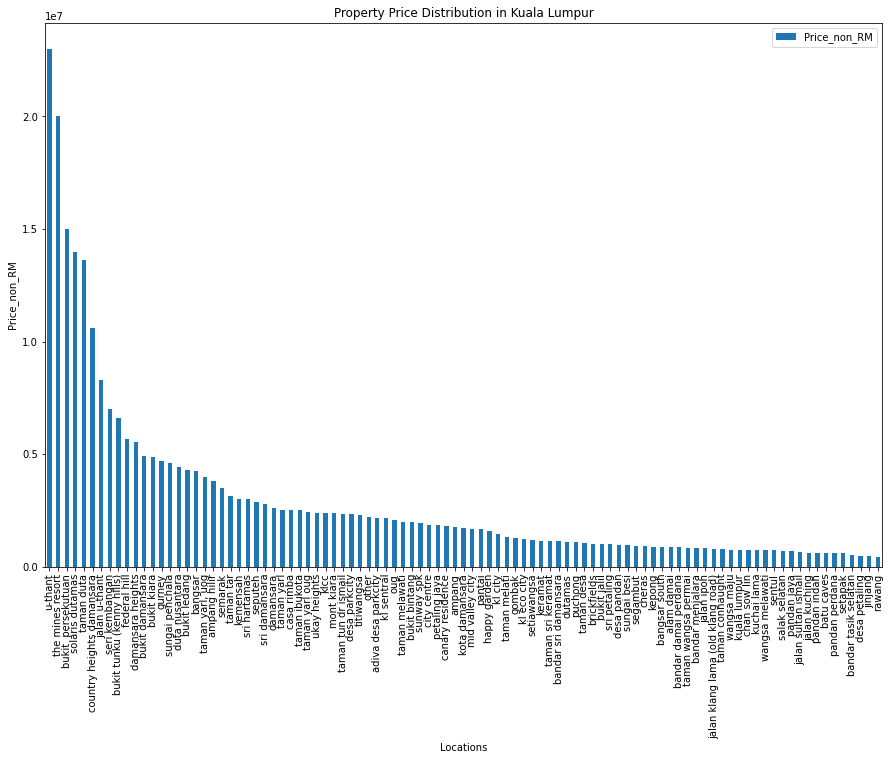

In [ ]:
# Total Price per Locations
all_property_prices = df.groupby('Location')['Price_non_RM'].mean().sort_values(ascending=False)

ax = all_property_prices.plot(kind='bar', title="Property Price Distribution in Kuala Lumpur", figsize=(15,10), legend=True, fontsize=10, rot=90)
ax.set_xlabel("Locations", fontsize=10)
ax.set_ylabel("Price_non_RM", fontsize=10)
plt.show()

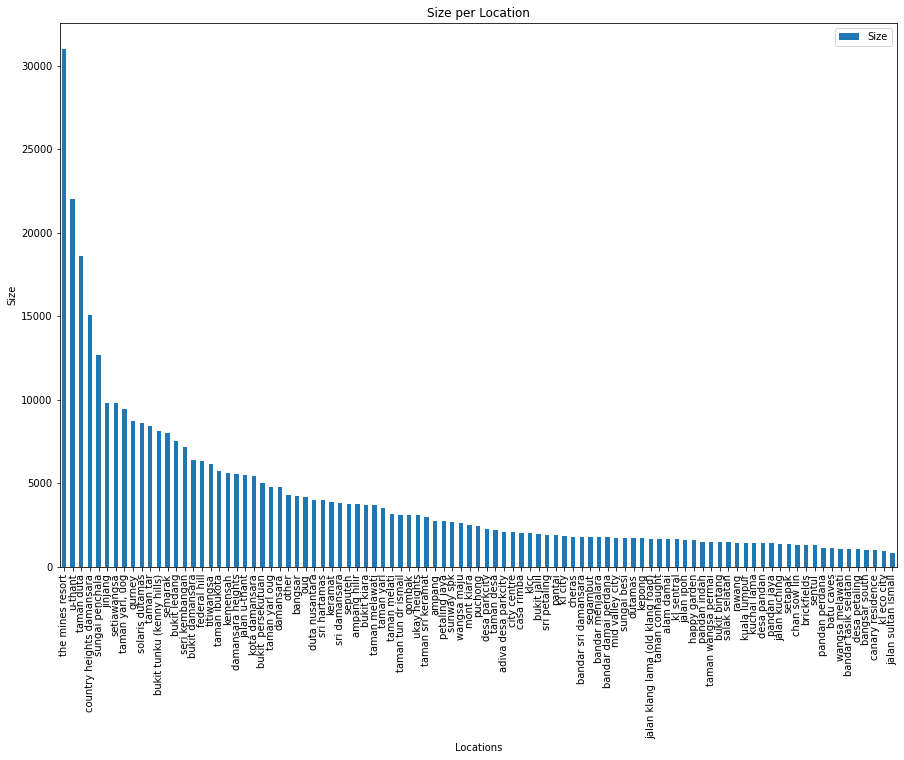

In [ ]:
# Room Size per Locations
all_property_prices = df.groupby('Location')['Size'].mean().sort_values(ascending=False)

ax = all_property_prices.plot(kind='bar', title="Size per Location", figsize=(15,10), legend=True, fontsize=10, rot=90)
ax.set_xlabel("Locations", fontsize=10)
ax.set_ylabel("Size", fontsize=10)
plt.show()

# Cluster Analysis

In [ ]:
from sklearn import cluster
from silhoutte import silhoutte_analysis

In [ ]:
df_clean.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size_Type,Size,Furnishing,Rooms_Num,Price_non_RM
0,klcc,"RM 1,250,000",2+1,3,2,Serviced Residence,Built-up,1335.0,Fully Furnished,3,1250000
2,dutamas,"RM 1,030,000",3,4,2,Condominium (Corner),Built-up,1875.0,Partly Furnished,3,1030000
4,bukit jalil,"RM 900,000",4+1,3,2,Condominium (Corner),Built-up,1513.0,Partly Furnished,5,900000
8,taman tun dr ismail,"RM 1,950,000",4+1,4,3,2-sty Terrace/Link House (EndLot),Land area,1875.0,Partly Furnished,5,1950000
9,sri petaling,"RM 385,000",3,2,1,Apartment (Intermediate),Built-up,904.0,Partly Furnished,3,385000


In [ ]:
df_cluster= df_clean[['Bathrooms','Car Parks','Size','Price_non_RM','Rooms_Num']]
df_cluster

,Bathrooms,Car Parks,Size,Price_non_RM,Rooms_Num
0,3,2,1335.0,1250000,3
2,4,2,1875.0,1030000,3
4,3,2,1513.0,900000,5
8,4,3,1875.0,1950000,5
9,2,1,904.0,385000,3
...,...,...,...,...,...
53873,2,0,1430.0,499000,3
53874,2,0,1092.0,480000,3
53875,2,0,852.0,475000,3
53881,2,0,1150.0,480000,3


<Figure size 1152x576 with 0 Axes>

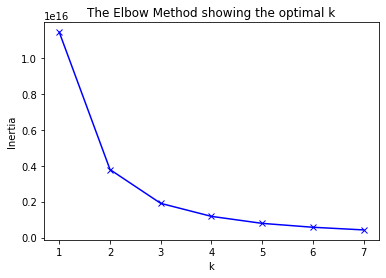

In [ ]:
import matplotlib.pyplot as plt
distortions = []
K = range(1,8)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(df_cluster)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.figure()
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.6534410744568815
For n_clusters = 3 The average silhouette_score is : 0.6144530637615727
For n_clusters = 4 The average silhouette_score is : 0.5710010778780559
For n_clusters = 5 The average silhouette_score is : 0.5417255160341011


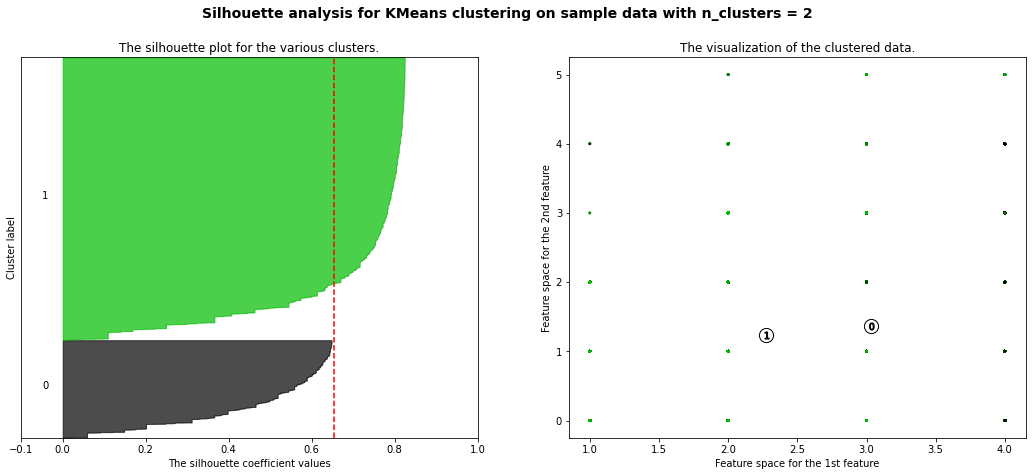

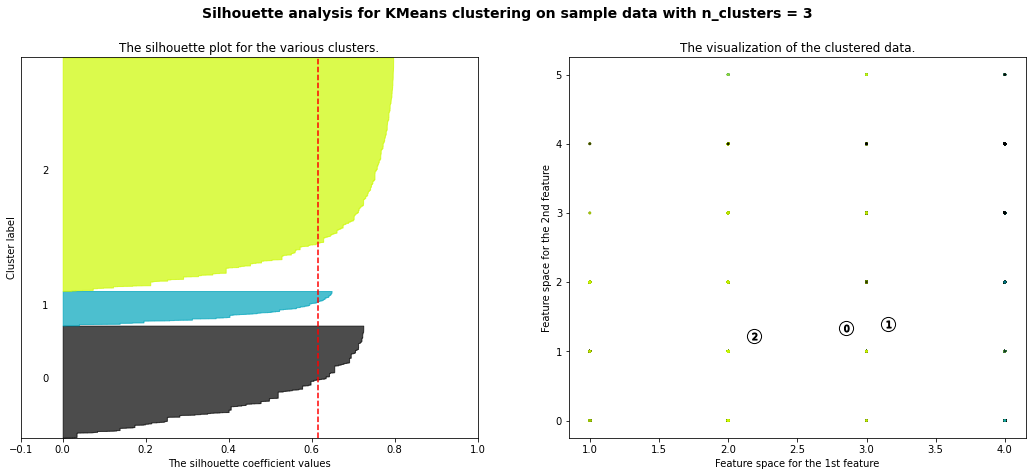

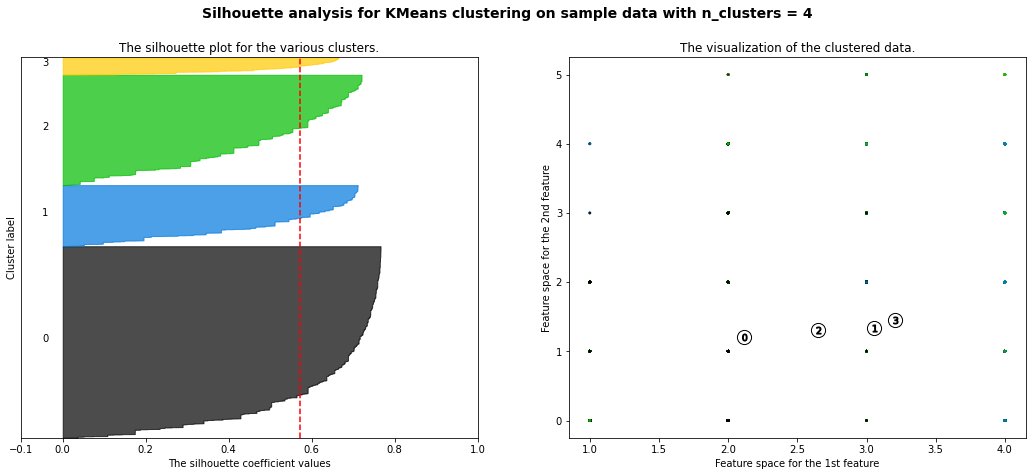

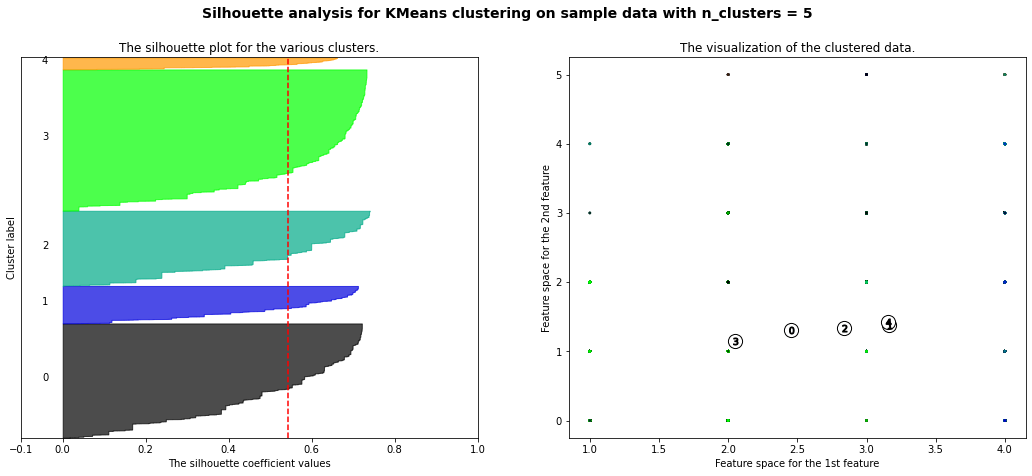

In [ ]:
silhoutte_analysis(df_cluster,[2, 3, 4,5])

In [ ]:
cluster_model = cluster.KMeans(n_clusters=3)
cluster_array = cluster_model.fit(df_cluster)
cluster_label = cluster_model.labels_
df_clean['cluster'] = cluster_label

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df_clean.groupby('cluster')['Bathrooms','Car Parks','Size','Price_non_RM','Rooms_Num'].agg(['count','mean','median','max','min'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Bathrooms                           ... Rooms_Num                         
            count      mean median max min  ...     count      mean median max min
cluster                                     ...                                   
0            8923  2.864956      3   4   1  ...      8923  3.463409      4   5   2
1           19555  2.196216      2   4   1  ...     19555  3.142930      3   5   2
2            2700  3.155185      3   4   1  ...      2700  3.573333      4   5   2

[3 rows x 25 columns]

# Summary : 


*   The distribution of data on each cluster is not really good (cluster 1 has a really big gap of amount comparing to others)
*   Clustering Name :
*   0 : Middle Property Price with Middle Room Number  
*   1 : Low Property Price with Small Room Number
*   2 : High Property Price with High Room Number


